In [8]:
import tensorflow as tf
import numpy as np

In [9]:
tf.__version__

'2.3.1'

In [10]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)

    except RuntimeError as e:
        print(e)


In [11]:
%matplotlib inline  
import matplotlib.pyplot as plt

def plot_val_train_accuracy(model, label):
    accuracy = model.history.history['accuracy']
    val_accuracy = model.history.history['val_accuracy']
    plt.plot(model.history.epoch, accuracy )
    plt.plot(model.history.epoch, val_accuracy)
    plt.xlabel(label)
    
def plot_val_train_loss(model, label):
    loss = model.history.history['loss']
    val_loss = model.history.history['val_loss']
    plt.plot(model.history.epoch, loss)
    plt.plot(model.history.epoch,val_loss)
    plt.xlabel(label)

In [12]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


In [13]:
x_train.shape

(60000, 28, 28)

In [14]:
y_train.shape

(60000,)

# Weights init to zeros, and SGD Optimizer

In [15]:
def get_fully_connected_network(kernel_weights='zeros', intralayer_activation='sigmoid'):
    inputs = tf.keras.Input(shape=(28,28), name="digits")
    flatten = tf.keras.layers.Flatten()(inputs)
    x1 = tf.keras.layers.Dense(100,kernel_initializer=kernel_weights, activation=intralayer_activation)(flatten)
    outputs  = tf.keras.layers.Dense(10,kernel_initializer=kernel_weights, activation="softmax")(x1)
    model_fullyconnect = tf.keras.Model(inputs, outputs)
    return model_fullyconnect

In [16]:
model_fullyconnect = get_fully_connected_network() #works when weights are initialized as zeros in case of fullyconnected
model_fullyconnect.compile(optimizer="SGD", loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=["accuracy"] )

In [17]:
model_fullyconnect.fit(x_train, y_train, 64,validation_split=0.1, epochs=30)

Epoch 1/30
844/844 [==============================] - 1s 2ms/step - loss: 1.9198 - accuracy: 0.2637 - val_loss: 1.7290 - val_accuracy: 0.3845
Epoch 2/30
844/844 [==============================] - 1s 1ms/step - loss: 1.6577 - accuracy: 0.3782 - val_loss: 1.5642 - val_accuracy: 0.3870
Epoch 3/30
844/844 [==============================] - 1s 1ms/step - loss: 1.5631 - accuracy: 0.3785 - val_loss: 1.5350 - val_accuracy: 0.3690
Epoch 4/30
844/844 [==============================] - 1s 1ms/step - loss: 1.5260 - accuracy: 0.3789 - val_loss: 1.4807 - val_accuracy: 0.3820
Epoch 5/30
844/844 [==============================] - 1s 1ms/step - loss: 1.4945 - accuracy: 0.3803 - val_loss: 1.4693 - val_accuracy: 0.3823
Epoch 6/30
844/844 [==============================] - 1s 1ms/step - loss: 1.4824 - accuracy: 0.3802 - val_loss: 1.4482 - val_accuracy: 0.3840
Epoch 7/30
844/844 [==============================] - 1s 1ms/step - loss: 1.4699 - accuracy: 0.3821 - val_loss: 1.4447 - val_accuracy: 0.3875
Epoch 

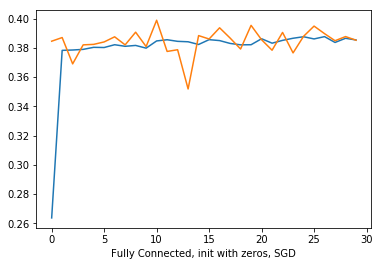

In [18]:
plot_val_train_accuracy(model_fullyconnect,"Fully Connected, init with zeros, SGD")

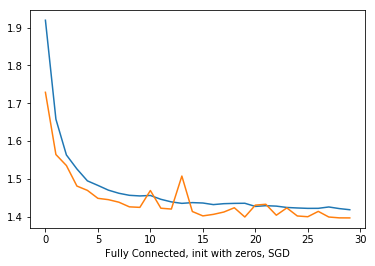

In [19]:
plot_val_train_loss(model_fullyconnect,"Fully Connected, init with zeros, SGD")

In [20]:
def get_conv_fullyconnected_model(kernel_weights='zeros', intralayer_activation='sigmoid'):
    inputs = tf.keras.Input(shape=(28,28,1), name="digits")
    conv1 = tf.keras.layers.Conv2D(20, kernel_size=5, kernel_initializer=kernel_weights)(inputs)
    pool1 = tf.keras.layers.MaxPool2D(2,2)(conv1)
    flatten = tf.keras.layers.Flatten()(pool1)
    x1 = tf.keras.layers.Dense(100, kernel_initializer=kernel_weights, activation=intralayer_activation)(flatten)
    outputs  = tf.keras.layers.Dense(10, kernel_initializer=kernel_weights, activation="softmax")(x1)
    model_conv = tf.keras.Model(inputs, outputs)
    return model_conv

In [21]:
model_conv_fullyconnected = get_conv_fullyconnected_model()

In [22]:
model_conv_fullyconnected.compile(optimizer="SGD", loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=["accuracy"] )

In [24]:
model_conv_fullyconnected.fit(x_train, y_train, 64,validation_split=0.1, epochs=30)

Epoch 1/30
844/844 [==============================] - 10s 11ms/step - loss: 2.3019 - accuracy: 0.1106 - val_loss: 2.3044 - val_accuracy: 0.1050
Epoch 2/30
844/844 [==============================] - 9s 11ms/step - loss: 2.3022 - accuracy: 0.1109 - val_loss: 2.3034 - val_accuracy: 0.1050
Epoch 3/30
844/844 [==============================] - 10s 12ms/step - loss: 2.3020 - accuracy: 0.1116 - val_loss: 2.3035 - val_accuracy: 0.1050
Epoch 4/30
844/844 [==============================] - 10s 12ms/step - loss: 2.3020 - accuracy: 0.1116 - val_loss: 2.3023 - val_accuracy: 0.1045
Epoch 5/30
844/844 [==============================] - 11s 13ms/step - loss: 2.3021 - accuracy: 0.1118 - val_loss: 2.3040 - val_accuracy: 0.1050
Epoch 6/30
844/844 [==============================] - 11s 13ms/step - loss: 2.3021 - accuracy: 0.1121 - val_loss: 2.3028 - val_accuracy: 0.1050
Epoch 7/30
844/844 [==============================] - 10s 12ms/step - loss: 2.3021 - accuracy: 0.1118 - val_loss: 2.3020 - val_accuracy: 

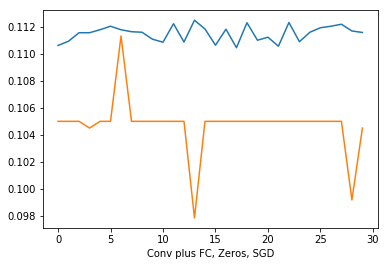

In [25]:
plot_val_train_accuracy(model_conv_fullyconnected, "Conv plus FC, Zeros, SGD")

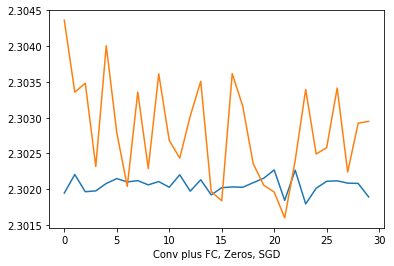

In [26]:
plot_val_train_loss(model_conv_fullyconnected, "Conv plus FC, Zeros, SGD")

In [27]:
from tensorflow.keras.layers import Reshape

In [28]:
# x_train = np.reshape(x_train,[-1,28,28,1])

In [29]:
def get_fully_convolutional_model(kernel_weights='zeros', intralayer_activation='sigmoid'):
    inputs = tf.keras.Input(shape=(28,28,1), name="digits")
    conv1 = tf.keras.layers.Conv2D(20, kernel_size=5,activation=intralayer_activation, kernel_initializer=kernel_weights )(inputs)
    pool1 = tf.keras.layers.MaxPool2D(2,2)(conv1)
    conv2 = tf.keras.layers.Conv2D(40, kernel_size=3, activation=intralayer_activation, kernel_initializer=kernel_weights)(pool1)
    pool2 = tf.keras.layers.MaxPool2D(2,2)(conv2)
    # conv3 = tf.keras.layers.Conv2D(20, kernel_size=3, activation="sigmoid")(pool2)
    # pool3 = tf.keras.layers.MaxPool2D(2,2)(conv3)

    conv4 = tf.keras.layers.Conv2D(20, kernel_size=3, activation=intralayer_activation, kernel_initializer=kernel_weights)(pool2)
    conv5 = tf.keras.layers.Conv2D(10, kernel_size=3, activation=intralayer_activation, kernel_initializer=kernel_weights)(conv4)
    softmax = tf.keras.layers.Softmax()(conv5),
#     reshaped_softmax = Reshape(target_shape=(10,1))(softmax),
    model_fullyconv = tf.keras.Model(inputs, softmax)
    return model_fullyconv
model_fullyconv = get_fully_convolutional_model()
model_fullyconv.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=["accuracy"] )

In [30]:
model_fullyconv.fit(x_train, y_train, 64,validation_split=0.1, epochs=30)

Epoch 1/30
844/844 [==============================] - 14s 16ms/step - loss: 2.0317 - accuracy: 0.1101 - val_loss: 1.7476 - val_accuracy: 0.1071
Epoch 2/30
844/844 [==============================] - 14s 16ms/step - loss: 1.7373 - accuracy: 0.1099 - val_loss: 1.6878 - val_accuracy: 0.1075
Epoch 3/30
844/844 [==============================] - 14s 16ms/step - loss: 1.6830 - accuracy: 0.1108 - val_loss: 1.6420 - val_accuracy: 0.1083
Epoch 4/30
844/844 [==============================] - 14s 16ms/step - loss: 1.6420 - accuracy: 0.1116 - val_loss: 1.6137 - val_accuracy: 0.1086
Epoch 5/30
844/844 [==============================] - 14s 16ms/step - loss: 1.6221 - accuracy: 0.1116 - val_loss: 1.6021 - val_accuracy: 0.1087
Epoch 6/30
844/844 [==============================] - 14s 16ms/step - loss: 1.6117 - accuracy: 0.1118 - val_loss: 1.5932 - val_accuracy: 0.1088
Epoch 7/30
844/844 [==============================] - 14s 17ms/step - loss: 1.6052 - accuracy: 0.1124 - val_loss: 1.5883 - val_accuracy:

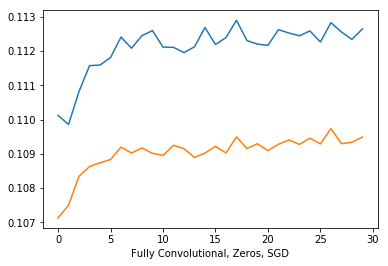

In [31]:
plot_val_train_accuracy(model_fullyconv, "Fully Convolutional, Zeros, SGD")

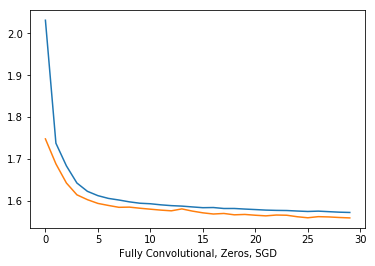

In [32]:
plot_val_train_loss(model_fullyconv, "Fully Convolutional, Zeros, SGD")

## Weights init to Ones, SGD

In [33]:
model_fullyconnected_ones = get_fully_connected_network(kernel_weights="ones")
model_fullyconnected_ones.compile(optimizer="SGD", loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=["accuracy"] )
model_fullyconnected_ones.fit(x_train, y_train, 64,validation_split=0.1, epochs=30)

Epoch 1/30
844/844 [==============================] - 1s 1ms/step - loss: 2.3049 - accuracy: 0.1065 - val_loss: 2.3091 - val_accuracy: 0.1000
Epoch 2/30
844/844 [==============================] - 1s 1ms/step - loss: 2.3049 - accuracy: 0.1068 - val_loss: 2.3064 - val_accuracy: 0.1045
Epoch 3/30
844/844 [==============================] - 1s 1ms/step - loss: 2.3050 - accuracy: 0.1044 - val_loss: 2.3025 - val_accuracy: 0.1113
Epoch 4/30
844/844 [==============================] - 1s 2ms/step - loss: 2.3046 - accuracy: 0.1062 - val_loss: 2.3081 - val_accuracy: 0.0995
Epoch 5/30
844/844 [==============================] - 1s 1ms/step - loss: 2.3050 - accuracy: 0.1050 - val_loss: 2.3100 - val_accuracy: 0.1050
Epoch 6/30
844/844 [==============================] - 2s 2ms/step - loss: 2.3050 - accuracy: 0.1056 - val_loss: 2.3060 - val_accuracy: 0.1050
Epoch 7/30
844/844 [==============================] - 1s 1ms/step - loss: 2.3045 - accuracy: 0.1055 - val_loss: 2.3066 - val_accuracy: 0.0952
Epoch 

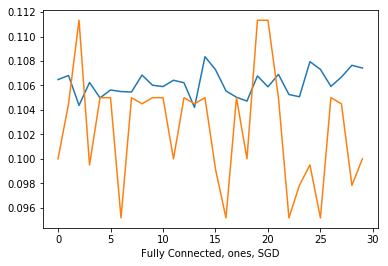

In [34]:
plot_val_train_accuracy(model_fullyconnected_ones,"Fully Connected, ones, SGD")

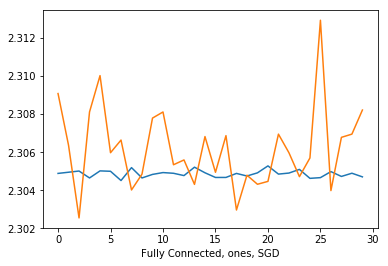

In [36]:
plot_val_train_loss(model_fullyconnected_ones,"Fully Connected, ones, SGD")

In [40]:
model_conv_fullyconnected_ones = get_conv_fullyconnected_model(kernel_weights='ones')
model_conv_fullyconnected_ones.compile(optimizer="SGD", loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=["accuracy"] )
model_conv_fullyconnected_ones.fit(x_train, y_train, 64,validation_split=0.1, epochs=30)

Epoch 1/30
844/844 [==============================] - 9s 11ms/step - loss: 2.3047 - accuracy: 0.1065 - val_loss: 2.3101 - val_accuracy: 0.1045
Epoch 2/30
844/844 [==============================] - 10s 12ms/step - loss: 2.3053 - accuracy: 0.1047 - val_loss: 2.3039 - val_accuracy: 0.1050
Epoch 3/30
844/844 [==============================] - 10s 11ms/step - loss: 2.3050 - accuracy: 0.1045 - val_loss: 2.3030 - val_accuracy: 0.0992
Epoch 4/30
844/844 [==============================] - 10s 12ms/step - loss: 2.3050 - accuracy: 0.1068 - val_loss: 2.3025 - val_accuracy: 0.1113
Epoch 5/30
844/844 [==============================] - 9s 11ms/step - loss: 2.3049 - accuracy: 0.1046 - val_loss: 2.3068 - val_accuracy: 0.1050
Epoch 6/30
844/844 [==============================] - 9s 11ms/step - loss: 2.3049 - accuracy: 0.1046 - val_loss: 2.3041 - val_accuracy: 0.1050
Epoch 7/30
844/844 [==============================] - 9s 11ms/step - loss: 2.3050 - accuracy: 0.1049 - val_loss: 2.3065 - val_accuracy: 0.1

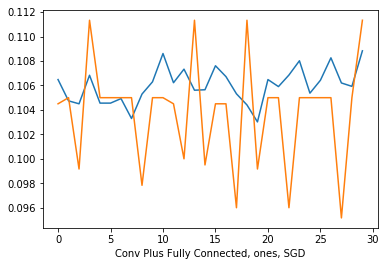

In [41]:
plot_val_train_accuracy(model_conv_fullyconnected_ones,"Conv Plus Fully Connected, ones, SGD")

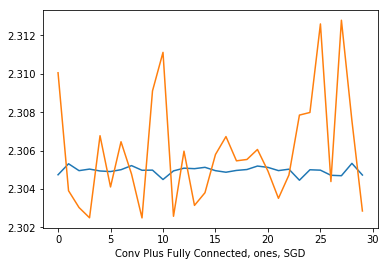

In [42]:
plot_val_train_loss(model_conv_fullyconnected_ones,"Conv Plus Fully Connected, ones, SGD")

In [43]:
model_fullyconv_ones = get_fully_convolutional_model(kernel_weights='ones')
model_fullyconv_ones.compile(optimizer="SGD", loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=["accuracy"] )
model_fullyconv_ones.fit(x_train, y_train, 64,validation_split=0.1, epochs=30)

Epoch 1/30
844/844 [==============================] - 14s 16ms/step - loss: 2.3026 - accuracy: 0.0988 - val_loss: 2.3026 - val_accuracy: 0.0979
Epoch 2/30
844/844 [==============================] - 14s 16ms/step - loss: 2.3026 - accuracy: 0.0988 - val_loss: 2.3026 - val_accuracy: 0.0979
Epoch 3/30
844/844 [==============================] - 14s 17ms/step - loss: 2.3026 - accuracy: 0.0988 - val_loss: 2.3026 - val_accuracy: 0.0979
Epoch 4/30
844/844 [==============================] - 14s 16ms/step - loss: 2.3026 - accuracy: 0.0988 - val_loss: 2.3026 - val_accuracy: 0.0979
Epoch 5/30
844/844 [==============================] - 14s 16ms/step - loss: 2.3026 - accuracy: 0.0988 - val_loss: 2.3026 - val_accuracy: 0.0979
Epoch 6/30
844/844 [==============================] - 14s 16ms/step - loss: 2.3026 - accuracy: 0.0988 - val_loss: 2.3026 - val_accuracy: 0.0979
Epoch 7/30
844/844 [==============================] - 14s 17ms/step - loss: 2.3026 - accuracy: 0.0988 - val_loss: 2.3026 - val_accuracy:

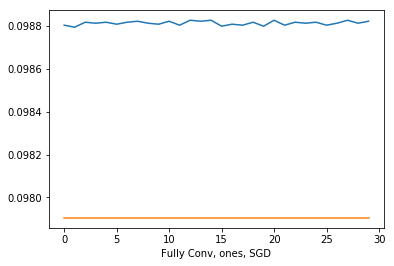

In [44]:
plot_val_train_accuracy(model_fullyconv_ones,"Fully Conv, ones, SGD")

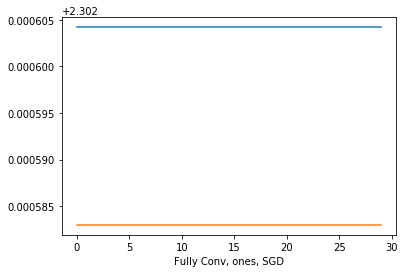

In [45]:
plot_val_train_loss(model_fullyconv_ones,"Fully Conv, ones, SGD")

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, InputLayer, Reshape


model = tf.keras.models.Sequential([
    InputLayer([28,28,1]),
    Conv2D(filters=16, kernel_size=3, activation='sigmoid', kernel_initializer=tf.keras.initializers.Zeros()),
    Conv2D(filters=16, kernel_size=3, activation='sigmoid', kernel_initializer=tf.keras.initializers.Zeros()),
    MaxPool2D(pool_size=2),
    Conv2D(filters=24, kernel_size=3, activation='sigmoid', kernel_initializer=tf.keras.initializers.Zeros()),
    Conv2D(filters=24, kernel_size=3, activation='sigmoid', kernel_initializer=tf.keras.initializers.Zeros()),
    MaxPool2D(pool_size=2),
    Conv2D(filters=32, kernel_size=4, activation='sigmoid', kernel_initializer=tf.keras.initializers.Zeros()),
    Conv2D(filters=10, kernel_size=1, activation=None, kernel_initializer=tf.keras.initializers.Zeros()),
    tf.keras.layers.Softmax(),
    Reshape([10])
    ])

model.summary()
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])


In [ ]:
model.weights

In [ ]:
model.fit(x_train, y_train, 64,validation_split=0.1, epochs=60)

In [ ]:
model.weights